In [9]:
from Bio import AlignIO
from Bio import codonalign
from Bio.Alphabet import generic_dna, Gapped, IUPAC
from skbio.stats.distance import DistanceMatrix
from Bio.Data.CodonTable import generic_by_id
from Bio.Alphabet import Gapped,IUPAC
from Bio.codonalign.codonalphabet import get_codon_alphabet
from Bio.codonalign.codonseq import cal_dn_ds
import pandas as pd
import itertools
path_to_files='../mauve_alignments/fna/'
path_out="/home/maeperez/projects/def-bacc/maeperez/Clams/VesicSymb_Evolution/dowstream_analyses_and_data/"


In [2]:
### Get list of genes to concat
with open(path_to_files+'filelist_nopseudo_638','r') as f:
    lines=[file[8:-4] for file in f.read().splitlines()]
print(len(lines))

with open('core_genes_with_recomb_AICc.txt','r') as f:
    recomb=[file for file in f.read().splitlines()]
    
print(len(recomb))
print(recomb[:3])
lines=[line for line in lines if line not in recomb]
print(len(lines))


638
143
['Rmag_0007', 'Rmag_0009', 'Rmag_0011']
495


In [3]:
#### Concatenate core genes

dic_sym={}
for gene in [lines[0]]:
    cat_aln_symb=AlignIO.read(path_to_files+'aligned_'+gene+'.fna','fasta')
    for i in range(len(cat_aln_symb)):
        cat_aln_symb[i].id=cat_aln_symb[i].id.split('|')[0]
        dic_sym[i]=cat_aln_symb[i].id
    
for gene in lines[1:]:
    new_aln=AlignIO.read(path_to_files+'aligned_'+gene+'.fna','fasta')
    for i in range(len(cat_aln_symb)):
        new_aln[i].id=new_aln[i].id.split('|')[0]
    cat_aln_symb+=new_aln
print(cat_aln_symb)

dic_sym[0]='X.Bathy'
dic_sym[8]='X.SUP05'

for k,v in dic_sym.items():
    dic_sym[k]=v.split('.')[1] 
print(dic_sym)    

SingleLetterAlphabet() alignment with 17 rows and 484320 columns
ATGCCAACAACTTGGGAAAAATGCCTTGAAACTTTGAAAGATAC...GGT Bathy
ATGTCGCAAATCTGGTCAGAATGTTTAAACACTCTTAGAGACAG...GGT R.fausta
ATGTCACAAACTTGGTCACAATGTTTAAACACTCTTAGAGACAG...GGT R.magnifica
ATGTCGAAAATTTGGTCACAATGTTTAAACACGCTTAGAAACAG...GGT R.pacifica
ATGTCGCAAACTTGGTCACAATGTTTAAACACACTTAGAGACAA...GGT R.phaseoliformis
ATGTCGCAAACTTGGTCACAATGTTTAAACACACTTAGAGGCAG...GGT R.pliocardia
ATGTCGCAAATCTGGTCAGAATGTTTAAACACTCTTAGAGACAG...GGT R.rectimargo
ATGTCGCAAACTTGGTCACAATGTTTAAACACGCTTAGAGACAA...GGT R.southwardae
ATGTCAAAAACTTGGGCGCAATGTTTAAGCACACTAAAAGACAC...GGT SUP05
ATGTCTCAAACTTGGTCACAATGCCTAAATACTCTTAAAGATAG...AGT V.diagonalis
ATGTCTCAAACTTGGTCACAATGCCTAAATACTCTTAAAGATAG...AGT V.extenta
ATGTCTCAAACTTGGTCACAATGCCTAAACACACTTAGAGATAG...AGT V.gigas1
ATGTCTCAAACTTGGTCACAATGCCTAAACACACTTAGAGATAG...AGT V.gigas2
ATGTCTCAAACTTGGTCACAATGCCTAAACACTCTTAGAGATAG...AGT V.marissinica
ATGTCTCAAACTTGGTCACAATGCCTAAACACACTTAGAGATAG...AGT V.okutanii
ATG

In [4]:
path_to_files='../mauve_alignments/fna/'
with open(path_to_files+'filelist_withpseudo_702-716','r') as f:
    lines=[file[:-4] for file in f.read().splitlines()]
print(len(lines))

dic_mito={}
for gene in [lines[702]]:
    cat_aln_mito=AlignIO.read(path_to_files+gene+'.fna','fasta')
    for i in range(len(cat_aln_mito)):
        cat_aln_mito[i].id=cat_aln_mito[i].id.split('|')[0]
        dic_mito[i]=cat_aln_mito[i].id
    
for gene in lines[703:-1]:
    new_aln=AlignIO.read(path_to_files+gene+'.fna','fasta')
    for i in range(len(cat_aln_mito)):
        new_aln[i].id=new_aln[i].id.split('|')[0]
    cat_aln_mito+=new_aln
print(cat_aln_mito)

dic_mito[10]='C.marissinica'
dic_mito[11]='C.fausta'

for k,v in dic_mito.items():
    dic_mito[k]=v.split('.')[1]    
dic_mito[13]='okutanii'

dic_mito

716
SingleLetterAlphabet() alignment with 17 rows and 12558 columns
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGGGG...AAG A.diagonalis
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATGGGTGG...AAG A.gigas1
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATGGGTGG...AAG A.gigas2
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAA A.mariana_ref
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAA A.phaseoliformis_ref
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAA A.phaseoliformis
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAA A.southwardae
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAA C.magnifica
ATGGTTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGGGG...AAA C.pacifica
ATGGTTAGGGATATTTTCACTTTTATGGATTGTTTTATAGGGGG...AAA C.rectimargo
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAA MK948426
ATGGTTAGGGATATTTTCACTTTTATGGATTGTTTTATAGGGGG...AAA MT528632.1
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATGGGCGG...AAA P.extenta
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAGGTGG...AAG P.okutanii_ref
ATGACTAGGGATATTTTTACTTTTATGGATTGTTTTATAG

{0: 'diagonalis',
 1: 'gigas1',
 2: 'gigas2',
 3: 'mariana_ref',
 4: 'phaseoliformis_ref',
 5: 'phaseoliformis',
 6: 'southwardae',
 7: 'magnifica',
 8: 'pacifica',
 9: 'rectimargo',
 10: 'marissinica',
 11: 'fausta',
 12: 'extenta',
 13: 'okutanii',
 14: 'soyoae1',
 15: 'soyoae2',
 16: 'pliocardia'}

# Distance with method ML

## Mito

In [5]:
### Init codon table

table5=generic_by_id[5]
table5.nucleotide_alphabet=IUPAC.ambiguous_dna
table5.protein_alphabet=IUPAC.extended_protein
print(table5)

table5.forward_table['AAN'] = "K"
table5.forward_table['GAY'] = "D"
table5.forward_table['YTA'] = "L"
table5.forward_table['ATY'] = "I"
table5.forward_table['TCY'] = "S"
table5.forward_table['GTY'] = "V"
table5.forward_table['GGY'] = "G"
table5.forward_table['CCY'] = "P"
table5.forward_table['GGR'] = "G"
table5.forward_table['AYA'] = "X"
table5.forward_table['NTA'] = "X"
table5.forward_table['ANA'] = "X"
table5.forward_table['ATN'] = "X"
table5.forward_table['ANN'] = "X"
table5.forward_table['NNN'] = "X"
table5.forward_table['NNA'] = "X"
table5.forward_table['NNG'] = "X"
table5.forward_table['GNN'] = "X"
table5.forward_table['NTG'] = "X"
table5.forward_table['GGN'] = "G"
table5.forward_table['TCN'] = "S"
t5=get_codon_alphabet(table5, gap_char="-")
t5.letters+=['AAN','GAY','YTA','ATY','TCY','GTY','GGY','CCY','GGR','AYA','NTA','ANA','ATN','ANN','NNN','NNA','NNG','GNN','NTG','GGN','TCN']
print(t5)

### Get core_mitoch

align=cat_aln_mito
codon_aln=codonalign.CodonAlignment.from_msa(align,alphabet=t5)

### get dnds

print(table5)
mat=codon_aln.get_dn_ds_matrix(method="ML",codon_table=table5)
dN=DistanceMatrix(mat[0]).condensed_form()
dS=DistanceMatrix(mat[1]).condensed_form()
dNdS=dN/dS

### Create df

ids=['-'.join(sorted([dic_mito[comb[0]],dic_mito[comb[1]]])) for comb in itertools.combinations(range(len(cat_aln_mito)), 2)]
df_mitoch=pd.DataFrame({'dnds_mito':dNdS,'ds_mito':dS, 'dn_mito': dN}, index=ids)
df_mitoch

Table 5 Invertebrate Mitochondrial, SGC4

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA S   | A
A | ATG M(s)| ACG T   | AAG K   | AGG S   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G 

,dnds_mito,ds_mito,dn_mito
diagonalis-gigas1,0.062032,0.497951,0.030889
diagonalis-gigas2,0.055517,0.384682,0.021357
diagonalis-mariana_ref,0.020079,2.615959,0.052525
diagonalis-phaseoliformis_ref,0.030159,1.702631,0.051350
diagonalis-phaseoliformis,0.020352,2.591556,0.052742
...,...,...,...
okutanii-soyoae2,0.054267,0.104049,0.005646
okutanii-pliocardia,0.018378,3.071481,0.056447
soyoae1-soyoae2,5.403190,0.000018,0.000097
pliocardia-soyoae1,0.018105,3.094782,0.056031


## Symbiont

In [6]:
### init codon table

table11=generic_by_id[11]
table11.nucleotide_alphabet=IUPAC.ambiguous_dna
table11.protein_alphabet=IUPAC.extended_protein
print(table11)

t11=get_codon_alphabet(table11, gap_char="-")

### get core_symb

align=cat_aln_symb
codon_aln=codonalign.CodonAlignment.from_msa(align,alphabet=t11)

### get dnds

mat=codon_aln.get_dn_ds_matrix(method="ML",codon_table=table11)
dN=DistanceMatrix(mat[0]).condensed_form()
dS=DistanceMatrix(mat[1]).condensed_form()
dNdS=dN/dS

Table 11 Bacterial, Archaeal, Plant Plastid

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA I(s)| ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG

In [7]:
### Create df

ids=['-'.join(sorted([dic_sym[comb[0]],dic_sym[comb[1]]])) for comb in itertools.combinations(range(len(cat_aln_symb)), 2)]
df_sym=pd.DataFrame({'dnds_symb':dNdS,'ds_symb':dS, 'dn_symb': dN}, index=ids)
df_sym

,dnds_symb,ds_symb,dn_symb
Bathy-fausta,0.065573,2.288757,1.500817e-01
Bathy-magnifica,0.057752,2.706452,1.563030e-01
Bathy-pacifica,0.068723,2.204424,1.514941e-01
Bathy-phaseoliformis,0.068195,2.133911,1.455211e-01
Bathy-pliocardia,0.066237,2.226196,1.474567e-01
...,...,...,...
marissinica-soyoae1,0.110623,0.184296,2.038730e-02
marissinica-soyoae2,0.110443,0.184325,2.035734e-02
okutanii-soyoae1,0.107133,0.087918,9.418874e-03
okutanii-soyoae2,0.106476,0.088018,9.371830e-03


In [8]:
## Merge symb and mitoch tables 

df=pd.merge(df_mitoch,df_sym,how='outer',left_index=True, right_index=True)
df

## Add info group
dic_group=dict(zip(list(set(list(dic_mito.values())+list(dic_sym.values()))),['R','R','V','V','R','R','R','R','R','V','R','V','V','R','F','V','V','V','F']))
df['Groups']=['-'.join(sorted([dic_group[i.split('-')[0]], dic_group[i.split('-')[1]]])) for i in df.index.values]
df

,dnds_mito,ds_mito,dn_mito,dnds_symb,ds_symb,dn_symb,Groups
Bathy-SUP05,NaN,NaN,NaN,0.055286,2.708222,1.497274e-01,R-V
Bathy-diagonalis,NaN,NaN,NaN,0.027825,6.087947,1.693974e-01,V-V
Bathy-extenta,NaN,NaN,NaN,0.027842,6.086714,1.694649e-01,V-V
Bathy-fausta,NaN,NaN,NaN,0.065573,2.288757,1.500817e-01,R-V
Bathy-gigas1,NaN,NaN,NaN,0.029493,5.749308,1.695651e-01,F-V
...,...,...,...,...,...,...,...
rectimargo-soyoae1,0.027005,2.240520,0.060506,0.097218,0.839383,8.160348e-02,F-R
rectimargo-soyoae2,0.027086,2.234590,0.060527,0.097109,0.839369,8.151063e-02,R-V
southwardae-soyoae1,0.029603,1.559997,0.046181,0.128405,0.716896,9.205286e-02,F-R
southwardae-soyoae2,0.029187,1.604965,0.046844,0.094777,0.822636,7.796684e-02,R-V


In [10]:
df.to_csv(path_out+'dsNuclMito_results.txt',header=True,index=False,sep='\t')

Text(0.5, 1.0, 'ds mitoch_vs_nucl')

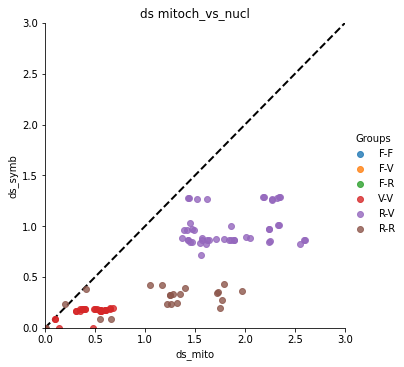

In [55]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='ds_mito', y='ds_symb',hue='Groups',fit_reg=False,data=df)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds mitoch_vs_nucl')

# Get transitions and transversions for testing saturation

In [302]:
from Bio.Alphabet import IUPAC,Gapped
a=SeqRecord(Seq('CT-GTACGT', Gapped(IUPAC.ambiguous_dna)), id="Alpha")
b=SeqRecord(Seq('CGAATGYCN', Gapped(IUPAC.ambiguous_dna)), id="Beta")
c=SeqRecord(Seq('TTTATGNCN', Gapped(IUPAC.ambiguous_dna)), id="Gamma")
test_aln=MultipleSeqAlignment([a,b,c])
print(test_aln)

def get_pairwise_tstv_counts(aln):
    from itertools import combinations,permutations
    import pandas as pd
    from collections import Counter
    from itertools import combinations,permutations
    ## get dictionnaries
    alphabet=['A','T','G','C','-','N','Y','R']
    chem={'A':'pur','T':'pyr','G':'pur','C':'pyr','Y':'pyr','R':'pur'}
    trs={}
    for item in permutations(alphabet,2):
        if item[0]==item[1]:
            continue
        elif '-' in item:
            continue
        elif 'N' in item:
            continue
        elif chem[item[0]]==chem[item[1]]:
            trs[item]='transition'
        else:
            trs[item]='transversion'
    
    ## iter through alignment
    tstv=pd.DataFrame(0,index=['-'.join(map(str,k)) for k in list(combinations(range(1,len(aln)+1),2))],columns=['transition','transversion'])
    for (i,j) in combinations(range(len(aln)),2):
        idx='-'.join(map(str,sorted([i+1,j+1])))
        pair_counts=Counter(zip(aln[i].seq,aln[j].seq))
        for pair in pair_counts.keys():
            if pair not in trs.keys():
                continue
            else:
                tstv[trs[pair]][idx]+=pair_counts[pair]
    return(tstv)
print(get_pairwise_tstv_counts(test_aln))

IUPACAmbiguousDNA() alignment with 3 rows and 9 columns
CT-GTACGT Alpha
CGAATGYCN Beta
TTTATGNCN Gamma
     transition  transversion
1-2           3             2
1-3           3             1
2-3           1             2


In [ ]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

symb_aln=AlignIO.read(aln_files['core_nucl'], "fasta")
mito_aln=AlignIO.read(aln_files['core_mitoch'], "fasta")
mito_tstv=get_pairwise_tstv_counts(mito_aln)
symb_tstv=get_pairwise_tstv_counts(symb_aln)

mitoch_to_nucl_id={'1':'10','2':'12','3':'m','4':'p','5':'5','6':'8','7':'3','8':'4','9':'7','10':'11','11':'13','12':'2','13':'6'}

mito_tstv.index=[mitoch_to_nucl_id[parts.split('-')[0]]+'-'+mitoch_to_nucl_id[parts.split('-')[1]] for parts in mito_tstv.index]
mito_tstv

In [342]:
tstv=pd.merge(mito_tstv,symb_tstv,how='outer',left_index=True, right_index=True,suffixes=['_mito','_symb'])
print(len(tstv),len(tstv.dropna()))
tstv

132 24


,transition_mito,transversion_mito,transition_symb,transversion_symb
1-10,NaN,NaN,101085.0,88284.0
1-11,NaN,NaN,101084.0,88296.0
1-12,NaN,NaN,101112.0,87942.0
1-13,NaN,NaN,101428.0,88413.0
1-2,NaN,NaN,100691.0,87883.0
...,...,...,...,...
p-4,1081.0,528.0,NaN,NaN
p-5,108.0,26.0,NaN,NaN
p-6,1037.0,645.0,NaN,NaN
p-7,1145.0,567.0,NaN,NaN


In [349]:
dnds=pd.merge(ml_dnds,tstv,how='outer',left_index=True, right_index=True)
print(len(dnds),len(dnds.dropna()))


132 24


In [363]:
## Add F84 divergence metric (computed from R)

In [360]:
a=[0.356600837398495, 0.342437880531651, 0.336736800473638, 0.330269100713592, 
0.330445909128989, 0.334989423323482, 0.328775163551314, 0.351325852779296, 
0.359400998415627, 0.359407364309874, 0.35845398358299, 0.357040468992303, 
0.181299219454233, 0.184552920125018, 0.181546592498205, 0.188822303448101, 
0.182469239545425, 0.180539666893684, 0.34818664224196, 0.0466479961765067, 
0.0466461612131896, 0.0470431941591794, 0.0245153563754635, 0.124924075782251, 
0.115776698014704, 0.116859823127428, 0.121731903690638, 0.102253769058554, 
0.33545097806759, 0.184081147887445, 0.184086782635012, 0.183786192124578, 
0.181474578447832, 0.0839349079235089, 0.112446427565942, 0.0384442506214986, 
0.103056373658951, 0.331311035322091, 0.188125860069169, 0.188142372569891, 
0.187859186642096, 0.184245865429984, 0.0894896649981173, 0.080409370836757, 
0.0737452594415743, 0.324805509756232, 0.18561319905018, 0.185612364125741, 
0.18490839032798, 0.181654629476825, 0.109152868622914, 0.0689802537901239, 
0.329662104714235, 0.192723274821815, 0.192737125690718, 0.192067256094224, 
0.188665947354059, 0.0996666156201067, 0.329098111061488, 0.185949512394323, 
0.185974601178151, 0.185736534426453, 0.182409007176986, 0.322213787280187, 
0.18469963865866, 0.184711736583896, 0.184033462592079, 0.18062187261629, 
0.350794958120263, 0.350808715291912, 0.350789219979041, 0.348704624391459, 
7.11710656212963e-05, 0.050625194862154, 0.0468997936402567, 
0.0506216624582744, 0.0468881388183925, 0.0471568319499304]
index_symb=["1-2", "1-3", "1-4", "1-5", "1-6", "1-7", "1-8", "1-9", "1-10", 
"1-11", "1-12", "1-13", "2-3", "2-4", "2-5", "2-6", "2-7", "2-8", 
"2-9", "2-10", "2-11", "2-12", "2-13", "3-4", "3-5", "3-6", "3-7", 
"3-8", "3-9", "3-10", "3-11", "3-12", "3-13", "4-5", "4-6", "4-7", 
"4-8", "4-9", "4-10", "4-11", "4-12", "4-13", "5-6", "5-7", "5-8", 
"5-9", "5-10", "5-11", "5-12", "5-13", "6-7", "6-8", "6-9", "6-10", 
"6-11", "6-12", "6-13", "7-8", "7-9", "7-10", "7-11", "7-12", 
"7-13", "8-9", "8-10", "8-11", "8-12", "8-13", "9-10", "9-11", 
"9-12", "9-13", "10-11", "10-12", "10-13", "11-12", "11-13", 
"12-13"]
symb_f84=pd.DataFrame(a,columns=['f84_symb'],index=index_symb)


a=[0.0905298012895266, 0.169178059505817, 0.170489854626169, 0.170688578690508, 
0.168208117256578, 0.166998381149109, 0.174551148575144, 0.182577046320856, 
0.102860232897859, 0.103886606539512, 0.104536372264397, 0.194973642063509, 
0.174420204341527, 0.172290031734709, 0.172947011277611, 0.172357649255815, 
0.171644203605772, 0.180794298532066, 0.185878721979926, 0.10712471177815, 
0.103976181156016, 0.104426742143624, 0.195400553658069, 0.0337993422107127, 
0.0341054888109547, 0.0323353447789053, 0.142386442724669, 0.133344448349498, 
0.144445497479662, 0.159113543417772, 0.164095990182876, 0.163720374915395, 
0.147134038171557, 0.0111818490654392, 0.0368861604404865, 0.14330770989876, 
0.133572384655081, 0.143790440270557, 0.158259540715155, 0.161511986459363, 
0.164508467122446, 0.148457503272707, 0.0376224723874809, 0.143967050073264, 
0.13367193140798, 0.145501884781482, 0.159477504444521, 0.161238688793551, 
0.16405556328912, 0.148849721393173, 0.142534663474728, 0.132091206842082, 
0.142463234956311, 0.159495262106571, 0.163136658635075, 0.160644073618814, 
0.14657105644922, 0.151132418941129, 0.155828973473823, 0.161324572536695, 
0.163386501032624, 0.165298392688457, 0.161199729303312, 0.0987987775174596, 
0.166013694422092, 0.169098712926188, 0.171274844322955, 0.161479540002149, 
0.175401303434575, 0.176567726704682, 0.180213336694974, 0.173868546776124, 
0.0783805271318536, 0.0764943851208584, 0.185447640986165, 0.030512401810034, 
0.189625243689289, 0.191429586553206]
index_mito=["1-2", "1-3", "1-4", "1-5", "1-6", "1-7", "1-8", "1-9", "1-10", 
"1-11", "1-12", "1-13", "2-3", "2-4", "2-5", "2-6", "2-7", "2-8", 
"2-9", "2-10", "2-11", "2-12", "2-13", "3-4", "3-5", "3-6", "3-7", 
"3-8", "3-9", "3-10", "3-11", "3-12", "3-13", "4-5", "4-6", "4-7", 
"4-8", "4-9", "4-10", "4-11", "4-12", "4-13", "5-6", "5-7", "5-8", 
"5-9", "5-10", "5-11", "5-12", "5-13", "6-7", "6-8", "6-9", "6-10", 
"6-11", "6-12", "6-13", "7-8", "7-9", "7-10", "7-11", "7-12", 
"7-13", "8-9", "8-10", "8-11", "8-12", "8-13", "9-10", "9-11", 
"9-12", "9-13", "10-11", "10-12", "10-13", "11-12", "11-13", 
"12-13"]
mito_f84=pd.DataFrame(a,columns=['f84_mito'],index=index_mito)
mito_f84.index=[mitoch_to_nucl_id[parts.split('-')[0]]+'-'+mitoch_to_nucl_id[parts.split('-')[1]] for parts in mito_f84.index]
mito_f84
f84=pd.merge(mito_f84,symb_f84,how='outer',left_index=True, right_index=True)
f84

In [362]:
dnds=pd.merge(dnds,f84,how='outer',left_index=True, right_index=True)
print(len(dnds),len(dnds.dropna()))

# groups=dict(zip(list(map(str,range(1,14)))+['m','p'],['FL','G','R','R','R','R','R','R','FL','G','G','G','G','R','R']))

# dnds['Groups']=['_'.join(sorted([groups[pair.split('-')[0]],groups[pair.split('-')[1]]])) for pair in dnds.index.values]
dnds.to_csv('/Users/maeperez/Desktop/non_coding/dnds_ML_methods.txt',header=True,sep='\t')

132 24


# Plots

## Check saturation

Text(0.5, 1.0, 'ds mitoch_vs_nucl')

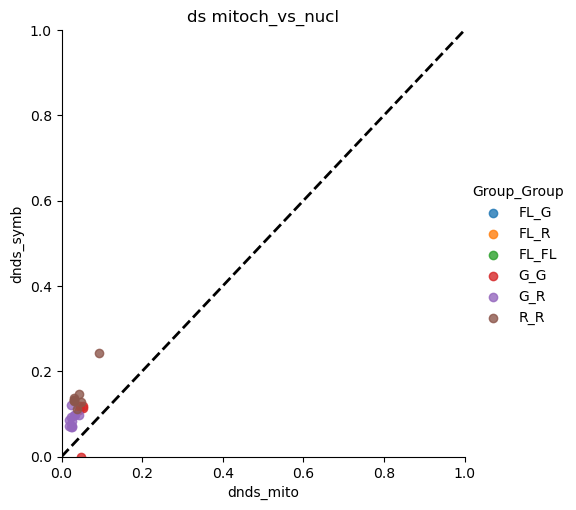

In [128]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='dnds_mito', y='dnds_symb',hue='Group_Group',fit_reg=False,data=ml_dnds)

# add trend line
xmin,xmax=0,1
ymin,ymax=0,1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds mitoch_vs_nucl')

Text(0.5, 1.0, 'ds mitoch_vs_nucl')

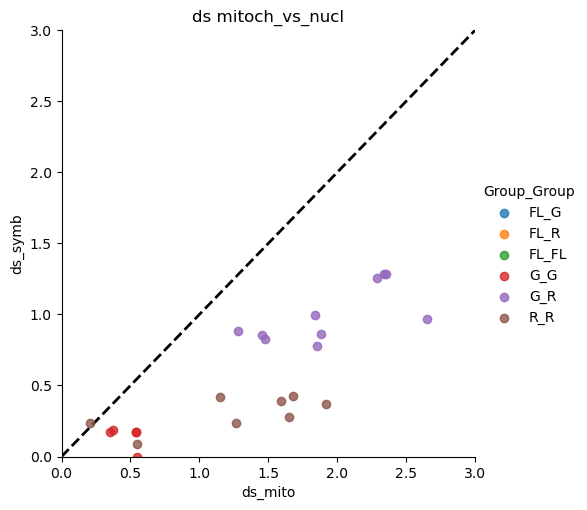

In [100]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='ds_mito', y='ds_symb',hue='Group_Group',fit_reg=False,data=ml_dnds)

# add trend line
xmin,xmax=0,3
ymin,ymax=0,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('ds mitoch_vs_nucl')

Text(0.5, 1.0, 'mitoch dnds vs ds')

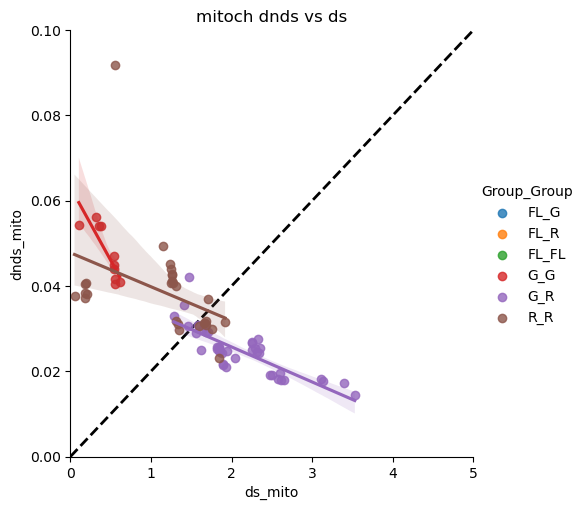

In [121]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
# plt.figure(figsize=(10,6))
 
# Create scatter plot
sns.lmplot(x='ds_mito', y='dnds_mito',hue='Group_Group',fit_reg=True,data=ml_dnds)

# add trend line
xmin,xmax=0,5
ymin,ymax=0,0.1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('mitoch dnds vs ds')

Text(0.5, 1.0, 'symb dnds vs ds')

<Figure size 1000x600 with 0 Axes>

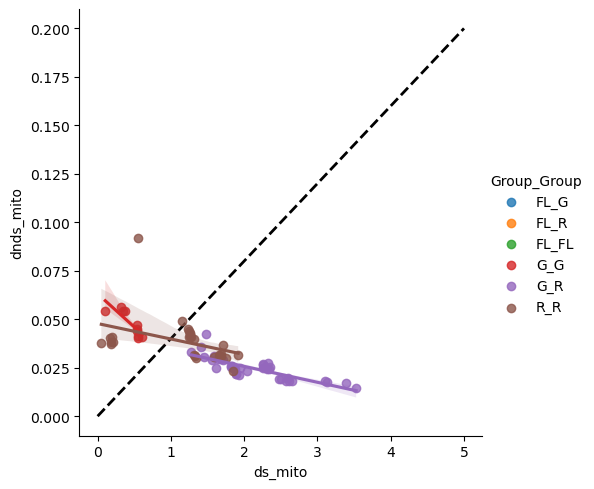

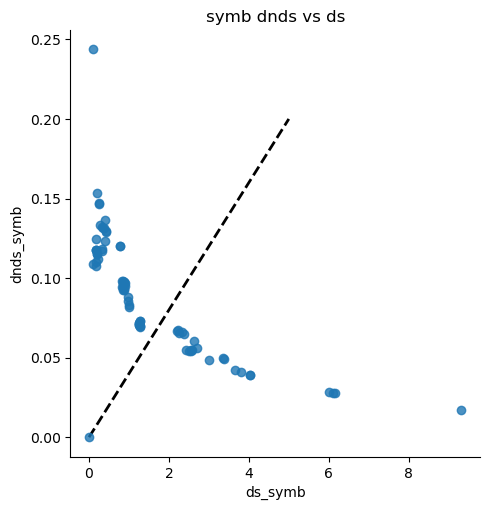

In [147]:
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(plt)
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
# add trend line
xmin,xmax=0,5
ymin,ymax=0,0.2

# # Create scatter plot
sns.lmplot(x='ds_mito', y='dnds_mito',hue='Group_Group',fit_reg=True,data=ml_dnds)
plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)
sns.lmplot(x='ds_symb',y='dnds_symb',fit_reg=False,data=ml_dnds)



plt.plot([xmin,xmax],[ymin,ymax],linewidth=2,linestyle='dashed',color='black',zorder=-1)

# Set title with matplotlib
plt.title('symb dnds vs ds')

In [130]:
ml_dnds[['ds_symb','dnds_symb','Group_Group']].dropna()

,ds_symb,dnds_symb,Group_Group
1-10,6.094420,0.028077,FL_G
1-11,6.155239,0.027567,FL_G
1-12,5.995410,0.028510,FL_G
1-13,3.355649,0.050021,FL_G
1-2,3.384841,0.049371,FL_G
...,...,...,...
8-9,2.432892,0.054503,FL_R
9-10,9.319028,0.016915,FL_G
9-11,4.035874,0.038987,FL_G
9-12,4.022370,0.038806,FL_G


In [354]:
mitoch_to_nucl_id={'1':'10','2':'12','3':'m','4':'p','5':'5','6':'8','7':'3','8':'4','9':'7','10':'11','11':'13','12':'2','13':'6'}
script='c('
for k,v in mitoch_to_nucl_id.items():
    script+='"'+str(k) +'" = "'+str(v)+'"'+', '

'c("1" = "10", "2" = "12", "3" = "m", "4" = "p", "5" = "5", "6" = "8", "7" = "3", "8" = "4", "9" = "7", "10" = "11", "11" = "13", "12" = "2", "13" = "6", '

,f84_mito,f84_symb
1-10,NaN,0.359401
1-11,NaN,0.359407
1-12,NaN,0.358454
1-13,NaN,0.357040
1-2,NaN,0.356601
...,...,...
p-4,0.133572,NaN
p-5,0.011182,NaN
p-6,0.148458,NaN
p-7,0.143790,NaN
